<a href="https://colab.research.google.com/github/FreMeli/Colab/blob/main/Act_17_L%C3%B3pez_Flores_Freya_Melissa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno**:Freya Melissa López Flores

**No. de cuenta:** A225952-0

**Profesor:** Lázaro Bustio Martínez

**Fecha de entrega:** 15/03/2023

**Objetivo:** El objetivo de esta tarea es poner en práctica lo aprendido sobre limpieza de datos. Nos ayudaremos de la siguiente página: https://towardsdatascience.com/a-straightforward-guide-to-cleaning-and-preparing-data-in-python-8c82f209ae33 

//El código fuente del artículo esta en: https://github.com/ifrankandrade/data_preprocessing/blob/main/Netflix_Data_Cleaning.ipynb 

##1. Quick Dataset Overview

In [43]:
import numpy as np
import pandas as pd #Importamos la libreria pandas
from google.colab import files #Para importar los archivos con los que trabajaremos
import io
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
upload = files.upload()

Saving T_17_netflix_titles.csv to T_17_netflix_titles (1).csv


In [64]:
df=pd.read_csv(io.BytesIO(upload["T_17_netflix_titles.csv"]),sep=",", header=0)#Leemos el archivo
df.head(5) #Para ver las primeras 5 filas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [65]:
df.dtypes #to find the data type of each column.
#This will help you identify whether the columns are numeric or categorical variables
#which is important to know before cleaning the data.

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [66]:
df.shape # to find the number of rows and columns

(8807, 12)

##2. Identify Missing Data

Missing data sometimes occurs when data collection was done improperly.

In [67]:
#A simple approach to identifying missing data is to use the .isnull() and .sum() methods
df.isnull().sum() #This shows us a number of “NaN” values in each column.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [68]:
#Representando los valores faltantes en porcentaje
for column in df.columns:
    percentage = df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


##3. Dealing with Missing Data

the following cover 3 simple ways of dealing with missing data:

*Remove a column or row with .drop, .dropna or .isnull

*Replace it by the mean, median or mode

*Replace it by an arbitrary number with .fillna()

**Remove a column or row with .drop, .dropna or .isnull:**

If you consider it’s necessary to remove a column because it has too many empty rows, you can use .drop() and add axis=1 as a parameter to indicate that what you want to drop is a column.

La líea de cñodigo para hacerlo sería:

//drop column

df.drop('director', axis=1)

**Replace it by the mean, median or mode:**

The mean and median are used to replace numeric data, while the mode replaces categorical data.

Obs:

The rating column contains 0.16% of missing data. We could easily complete that tiny portion of data with the mode since the rating is a categorical value.

In [69]:
mode = ''.join(df['rating'].mode())#First, we calculated the mode (TV-MA)
df['rating'].fillna(mode, inplace=True)#we filled all the empty values with .fillna.

In [70]:
df['duration'] = df['duration'].fillna(df['duration'].value_counts().index[0])

**Replace it by an arbitrary number with .fillna():**

If the data is numeric, we can also set an arbitrary number to prevent removing any row without affecting our model's results.

If the duration column was a numeric value (currently, the format is string e.g. 90 minutes), we could replace the empty values by 0 with the following code.

df_netflix_2019['duration'].fillna(0, inplace=True)



##4. Identifying Outliers

An outlier is that data that that differs significantly from other observations. A dataset might contain real outliers or outliers obtained after poor data collection or caused by data entry errors.

**Using histograms to identify outliers within numeric data**

We’re going to use the duration as a reference that will help us identify outliers in the Netflix catalog. 

Ya que duration es un string we need to filter it out.

In [71]:
#creating column (extract)
df_movie = df[df['type']=='Movie'] #we’ll take only movies from the dataset
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).astype(int))#Extract the numeric values from the duration column.

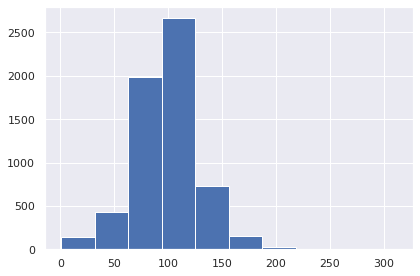

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

Obs. we can say that movies in the first bar (3'–34') and the last visible bar (>189') are probably outliers. They might be short films or long documentaries that don’t fit well in our movie category

**Using boxplots to identify outliers within numeric data**



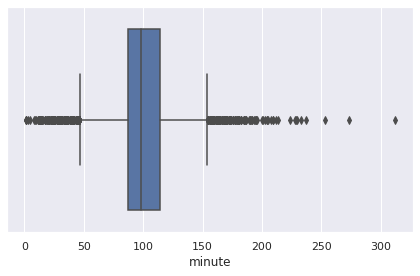

In [73]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

Also, we can identify some elements of the boxplot like the lower quartile (Q1) and upper quartile (Q3) with the.describe() method.

In [74]:
df_movie['minute'].describe()

count    6131.000000
mean       99.528951
std        28.367576
min         1.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In addition to that, you can easily display all elements of the boxplot and even make it interactive with Plotly.

In [75]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
fig = go.Figure()
fig.add_box(x=df_movie['minute'], text=df_movie['minute'])
iplot(fig)

**Using bars to identify outliers within categorical data:**

In case the data is categorical, you can identify categories with few observations by plotting bars.

In this case, we’ll use the built-in Pandas visualization to make the bar plot.

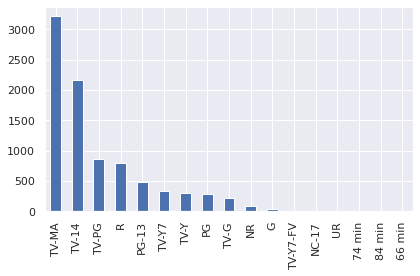

In [76]:
fig=df['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

Obs. In the plot above, we can see that the mode (the value that appears most often in the column) is ‘TV-MA’ while ‘NC-17’ and ‘UR’ are uncommon.

##5. Dealing with Outliers

 we can easily filter them out by using Python’s operators.

In [77]:
df_movie[(df_movie['minute']<43) | (df_movie['minute']>158)]
#filtering outliers out
df_movie = df_movie[(df_movie['minute']>43) & (df_movie['minute']<158)]
#The df_movie created now contains only movies that last between 43' and 158'.

In [78]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


##6. Dealing with Inconsistent Data Before Merging 2 Dataframes

Unfortunately, most of the time, datasets have many inconsistencies because they come from different sources.

From now on, we’ll use a second dataset df_netflix_originals that contains only Netflix originals (.csv available on my Github), and we’ll merge it with the original dataset df_netflix_2019 to determine original and non-original content.

In [81]:
upload1 = files.upload()

Saving T17_Originales_Netflix.csv to T17_Originales_Netflix.csv


In [82]:
df_O=pd.read_csv(io.BytesIO(upload1["T17_Originales_Netflix.csv"]),sep=",", header=0)#Leemos el archivo
df_O.head(5) #Para ver las primeras 5 filas

,titles,years,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix


**Dealing with inconsistent column names**

If you try to merge 2 datasets based on a column that has different data types, Python will throw an error. That’s why you have to make sure the type is the same. If the same column have different types, you can use the **.astype** method to normalize it.

In [84]:
df_O.rename(columns={'titles':'title', 'years':'release_year'}, inplace=True)


In [85]:
df_O = df_O.astype({"release_year": int})

In [86]:
df_O

,title,release_year,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
...,...,...,...,...,...,...,...,...,...,...
1512,Ralphie May: Unruly,2015,Comedy,4.7,83 min,"Filmed in front of a raucous crowd, comedian R...","John Asher, Ralphie May",357,Movie,Netflix
1513,John Hodgman: Ragnarok,2013,"Comedy, Music",6.2,68 min,The deranged millionaire John Hodgman plays hi...,"Lance Bangs, John Hodgman, Scott Adsit, Cynthi...",292,Movie,Netflix
1514,Jimmy Carr: Funny Business,2016,Comedy,7.2,62 min,"A man, with an incredibly stupid laugh, tells ...","Sam Wrench, Jimmy Carr","3,445",Movie,Netflix
1515,Anthony Jeselnik: Thoughts and Prayers,2015,Comedy,7.8,59 min,Stand up comedian and former Late Night with J...,"Adam Dubin, Anthony Jeselnik, Peggy","4,300",Movie,Netflix


In [89]:
df_O.dtypes

title            object
release_year      int64
genres           object
imdb            float64
runtime          object
description      object
stars            object
votes            object
type             object
original         object
dtype: object

##7. Text Normalization

* Removing whitespace, punctuation and non-alphanumeric characters
*Tokenization, Stemming, Lemmatization, removing stop words


**Dealing with inconsistent capitalization**


Before merging 2 frames, we have to make sure most rows will match, and normalizing capitalization helps with it.

There are many ways to lower case text within a frame. Below you can see two options (.apply or .str.lower)

In [93]:
df_O['title'] = df_O['title'].apply(lambda x:x.lower())
df_O['title'] = df_O['title'].str.lower()


In [94]:
df_O

,title,release_year,genres,imdb,runtime,description,stars,votes,type,original
0,zumbo's just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix
3,you vs. wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
...,...,...,...,...,...,...,...,...,...,...
1512,ralphie may: unruly,2015,Comedy,4.7,83 min,"Filmed in front of a raucous crowd, comedian R...","John Asher, Ralphie May",357,Movie,Netflix
1513,john hodgman: ragnarok,2013,"Comedy, Music",6.2,68 min,The deranged millionaire John Hodgman plays hi...,"Lance Bangs, John Hodgman, Scott Adsit, Cynthi...",292,Movie,Netflix
1514,jimmy carr: funny business,2016,Comedy,7.2,62 min,"A man, with an incredibly stupid laugh, tells ...","Sam Wrench, Jimmy Carr","3,445",Movie,Netflix
1515,anthony jeselnik: thoughts and prayers,2015,Comedy,7.8,59 min,Stand up comedian and former Late Night with J...,"Adam Dubin, Anthony Jeselnik, Peggy","4,300",Movie,Netflix


**Remove blank spaces with .strip()**

Sometimes data has leading or trailing white spaces. We can get rid of them with the .strip method

In [95]:
df_O['title'] = df_O['title'].apply(lambda x:x.strip())
df_O['title'] = df_O['title'].str.strip()
df_O

,title,release_year,genres,imdb,runtime,description,stars,votes,type,original
0,zumbo's just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix
3,you vs. wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
...,...,...,...,...,...,...,...,...,...,...
1512,ralphie may: unruly,2015,Comedy,4.7,83 min,"Filmed in front of a raucous crowd, comedian R...","John Asher, Ralphie May",357,Movie,Netflix
1513,john hodgman: ragnarok,2013,"Comedy, Music",6.2,68 min,The deranged millionaire John Hodgman plays hi...,"Lance Bangs, John Hodgman, Scott Adsit, Cynthi...",292,Movie,Netflix
1514,jimmy carr: funny business,2016,Comedy,7.2,62 min,"A man, with an incredibly stupid laugh, tells ...","Sam Wrench, Jimmy Carr","3,445",Movie,Netflix
1515,anthony jeselnik: thoughts and prayers,2015,Comedy,7.8,59 min,Stand up comedian and former Late Night with J...,"Adam Dubin, Anthony Jeselnik, Peggy","4,300",Movie,Netflix


**Remove or replace strings with .replace() or .sub()**

Texts between two datasets often have disagreements in punctuation. You can remove it with .apply and .sub or by using .replace

For example, the regex[^\w\s] will help you remove characters other than words (a-z, A-Z, 0–9, _ ) or spaces.



In [98]:
# remove punctuation: clean characters other than word or spaces
#df_O['title'] = df_O['title'].apply(lambda x:replace.sub('[^\w\s]','',x))
df_O['title'].replace('[^\w\s]', '', regex=True, inplace=True)
df_O

,title,release_year,genres,imdb,runtime,description,stars,votes,type,original
0,zumbos just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix
3,you vs wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
...,...,...,...,...,...,...,...,...,...,...
1512,ralphie may unruly,2015,Comedy,4.7,83 min,"Filmed in front of a raucous crowd, comedian R...","John Asher, Ralphie May",357,Movie,Netflix
1513,john hodgman ragnarok,2013,"Comedy, Music",6.2,68 min,The deranged millionaire John Hodgman plays hi...,"Lance Bangs, John Hodgman, Scott Adsit, Cynthi...",292,Movie,Netflix
1514,jimmy carr funny business,2016,Comedy,7.2,62 min,"A man, with an incredibly stupid laugh, tells ...","Sam Wrench, Jimmy Carr","3,445",Movie,Netflix
1515,anthony jeselnik thoughts and prayers,2015,Comedy,7.8,59 min,Stand up comedian and former Late Night with J...,"Adam Dubin, Anthony Jeselnik, Peggy","4,300",Movie,Netflix


##8. Merging Datasets

Finally, we can merge the dataset df_netflix_originals and df_netflix_2019. With this, we can identify which movies are Netflix originals and which only belong to the catalog. In this case, we do an outer join to give ‘Catalog’ value to all the rows with empty values in the "Original" column.

In [99]:
df_netflix = pd.merge(df_O, df, on=['title', 'type', 'release_year'],
                           how='outer')
df_netflix['original'].fillna('Catalog', inplace=True)
df_netflix

,title,release_year,genres,imdb,runtime,description_x,stars,votes,type,original,show_id,director,cast,country,date_added,rating,duration,listed_in,description_y
0,zumbos just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,you vs wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,Zodiac,2007,NaN,NaN,NaN,NaN,NaN,NaN,Movie,Catalog,s8803,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
10317,Zombie Dumb,2018,NaN,NaN,NaN,NaN,NaN,NaN,TV Show,Catalog,s8804,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
10318,Zombieland,2009,NaN,NaN,NaN,NaN,NaN,NaN,Movie,Catalog,s8805,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
10319,Zoom,2006,NaN,NaN,NaN,NaN,NaN,NaN,Movie,Catalog,s8806,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


**Remove duplicates with .drop_duplicates():**

One of the pitfalls of outer join with 2 key columns is that we’ll obtain duplicated rows if we consider a column alone. In this case, we merged based on the title and release_year columns, so most likely there are titles duplicated that have different release_year.

You can drop duplicates within a column with the .drop_duplicates method

In [100]:
#drop_duplicates: data duplicated because of disagreement in releaase_year
df_netflix.drop_duplicates(['title'], keep='first', inplace=True)
df_netflix

,title,release_year,genres,imdb,runtime,description_x,stars,votes,type,original,show_id,director,cast,country,date_added,rating,duration,listed_in,description_y
0,zumbos just desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zona rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Mor\'e1n, Manu Nna, Ana J...",33,TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,young wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam P\'e5lsson, Leanne Best, Richard Dillane,...","5,419",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,you vs wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,you,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,Zodiac,2007,NaN,NaN,NaN,NaN,NaN,NaN,Movie,Catalog,s8803,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
10317,Zombie Dumb,2018,NaN,NaN,NaN,NaN,NaN,NaN,TV Show,Catalog,s8804,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
10318,Zombieland,2009,NaN,NaN,NaN,NaN,NaN,NaN,Movie,Catalog,s8805,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
10319,Zoom,2006,NaN,NaN,NaN,NaN,NaN,NaN,Movie,Catalog,s8806,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [101]:
df_netflix[['original', 'type']].value_counts()

original  type   
Catalog   Movie      6130
          TV Show    2674
 Netflix  TV Show    1009
          Movie       503
Netflix}  Movie         1
dtype: int64